<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Nov3-4/LogisticRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regresion**

* Implementar el algoritmo de regresión logística, y aplicarlo al conjunto de datos de imágenes de perros y gatos que se encuentra en https://drive.google.com/drive/folders/1cKaP9vWDVXTgF_u5VB7eF-iSnfqHjb_w?usp=share_link

* Pueden usar como base el notebook en: https://github.com/DCI-alxogm/ML2023/tree/main/Nov3-4

In [2]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos los datos que vamos a trabajar.

In [4]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files = glob.glob('/content/drive/MyDrive/Machine Learning/Data/CATS_DOGS/*')

In [5]:
len(files)

1787

In [6]:
# Numero de pixeles para nuestras imágenes.
num_px=64

Veamos algunas de las imagenes.

Preparamos el dataset de entrenamiento.

In [7]:
train_x = []
train_y = []
for file in files[:835]:
    img = Image.open(file)
    img = img.resize((num_px,num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y = np.asarray(train_y)
train_x = np.asarray(train_x)

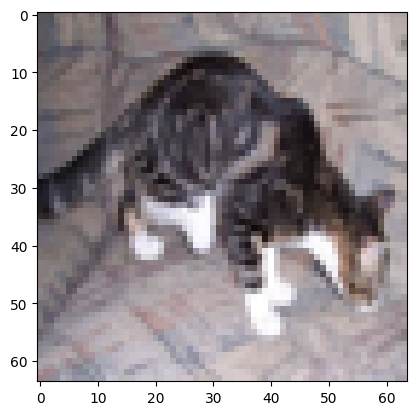

In [8]:
plt.imshow(train_x[0])

Preparamos el dataset de prueba.

In [9]:
test_x = []
test_y = []
for file in files[835:]:
    #print(file)
    img = Image.open(file)
    img = img.resize((num_px,num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y = np.asarray(test_y)
test_x = np.asarray(test_x)

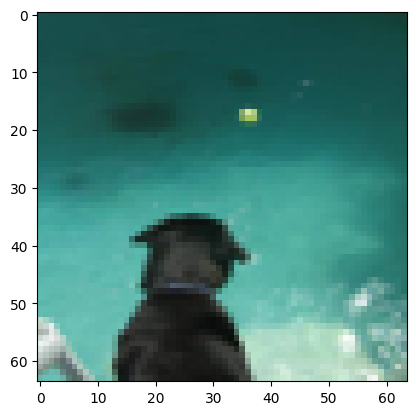

In [10]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [11]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes.

In [12]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

Ya esta listo nuestro set de datos para poder trabajar con el.

In [13]:
# Inicializando los parámetros
W = np.zeros((train_set_x.shape[0], 1)) # Es un peso para cada Pixel
b = 0

# Función  de activación
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función para calcular el costo
def compute_cost(A, Y):
    m = Y.shape[0]
    cost = - (1 / m) * (np.dot(Y, np.log(A).T) + np.dot(1 - Y, np.log(1 - A).T)) # Función costo de la regresión logistica
    return cost

# Optimización por gradiente
def optimize(W, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []

    for i in range(num_iterations):
        m = X.shape[1]

        # Calcular la hipótesis
        Z = np.dot(W.T, X) + b
        A = sigmoid(Z)

        # Calcular el costo
        cost = compute_cost(A, Y)

        # Calcular los gradientes
        dW = (1 / m) * (X @ (A - Y).T)
        db = (1 / m) * np.sum(A - Y)

        # Actualizar los parámetros
        W = W - learning_rate * dW
        b = b - learning_rate * db

        # Registrar el costo
        if i % 100 == 0:
            costs.append(cost)

        # Imprimir el costo
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return W, b, costs

# Entrenamiento
num_iterations = 4000
learning_rate = 0.003

W, b, costs = optimize(W, b, train_set_x, train_y, num_iterations, learning_rate, print_cost=True)

# Función para realizar predicciones
def predict(W, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))

    # Calcular la hipótesis
    Z = np.dot(W.T, X) + b #Entrada ponderada
    A = sigmoid(Z) #Predicción

    for i in range(A.shape[1]):
        # Se fija el valor umbral
        Y_prediction[0, i] = 1 if A[0, i] >= 0.5 else 0

    return Y_prediction

# Predicciones en el conjunto de entrenamiento y prueba
Y_prediction_train = predict(W, b, train_set_x)
Y_prediction_test = predict(W, b, test_set_x)

# Calcular la precisión
train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - train_y)) * 100
test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - test_y)) * 100

print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}%")
print(f"Precisión en el conjunto de prueba: {test_accuracy}%")

Cost after iteration 0: [0.69314718]
Cost after iteration 100: [0.31595712]
Cost after iteration 200: [0.30392565]
Cost after iteration 300: [0.2946446]
Cost after iteration 400: [0.28691257]
Cost after iteration 500: [0.28016954]
Cost after iteration 600: [0.27412021]
Cost after iteration 700: [0.26859237]
Cost after iteration 800: [0.26347717]
Cost after iteration 900: [0.2587012]
Cost after iteration 1000: [0.25421213]
Cost after iteration 1100: [0.24997103]
Cost after iteration 1200: [0.24594777]
Cost after iteration 1300: [0.24211835]
Cost after iteration 1400: [0.23846317]
Cost after iteration 1500: [0.23496591]
Cost after iteration 1600: [0.23161272]
Cost after iteration 1700: [0.22839173]
Cost after iteration 1800: [0.22529263]
Cost after iteration 1900: [0.22230637]
Cost after iteration 2000: [0.21942497]
Cost after iteration 2100: [0.21664132]
Cost after iteration 2200: [0.21394906]
Cost after iteration 2300: [0.21134246]
Cost after iteration 2400: [0.20881634]
Cost after ite

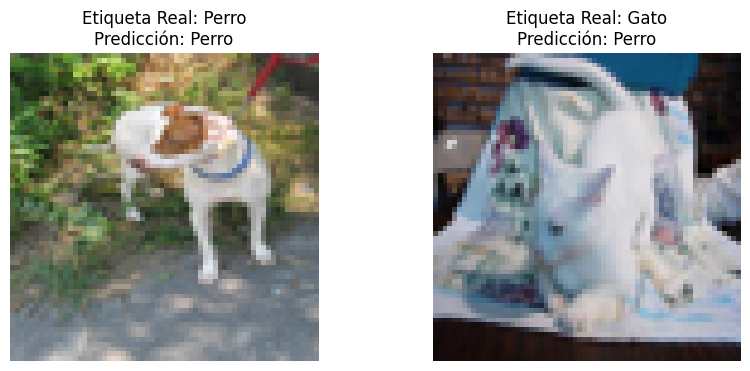

In [14]:
# Función para mostrar una imagen con la etiqueta real y la predicción
def visualize_prediction(image, actual_label, predicted_label):
    plt.imshow(image)
    plt.axis('off')
    label = "Perro" if actual_label == 1 else "Gato"
    prediction = "Perro" if predicted_label == 1 else "Gato"
    plt.title(f"Etiqueta Real: {label}\nPredicción: {prediction}")

# Elegir un par de imágenes para mostrar
index1 = 154 # Índice de la primera imagen
index2 = 652  # Índice de la segunda imagen

# Realizar predicciones en las imágenes
prediction1 = Y_prediction_test[0, index1]
prediction2 = Y_prediction_test[0, index2]

# Mostrar las imágenes junto con las predicciones
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
visualize_prediction(test_x[index1], test_y[index1], prediction1)

plt.subplot(1, 2, 2)
visualize_prediction(test_x[index2], test_y[index2], prediction2)

plt.show()